# Matplotlib

[Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

Let's look at the examples.

## First plot

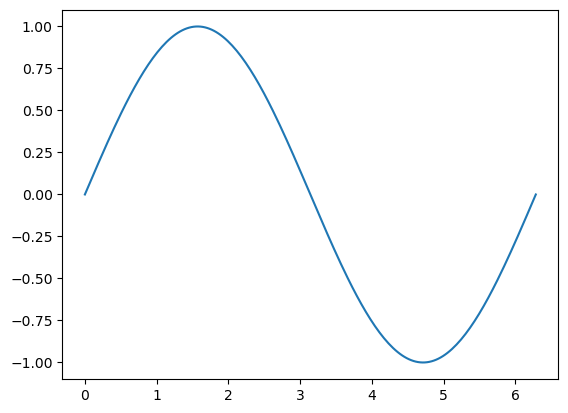

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

# Creates a "fig" and an "ax" objects.
fig, ax = plt.subplots()
# fig: object that references the entire figure
# ax: object that references the plot area

ax.plot(x, y)

# Display all open figures (you can have several)
plt.show()

## Anatomia de uma figura de matplotlib

Uma figura de matplotlib tem vários elementos. A "figura" em si é um container de sistemas de eixos. É possível ter vários eixos numa só figura.

<img src="https://matplotlib.org/devdocs/_images/anatomy.png" width="600" height="600">

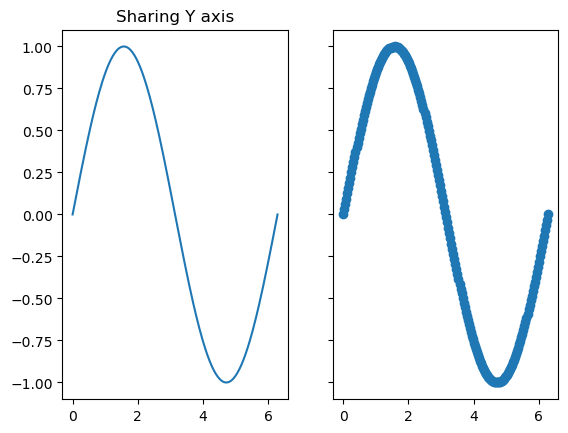

In [7]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) #nrows=1, ncols=2, partilhar eixo dos xx
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
plt.show()

O sistema de eixos "ax1" impacta apenas o que está no primeiro plot. O sistema de eixos "ax2" apenas o que está no segundo. Como o eixo dos "yy" é partilhado, o gráfico ajusta os limites automaticamente.

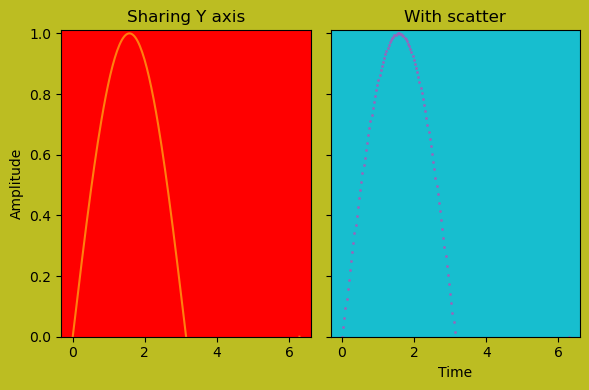

In [46]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(6,4)) #nrows=1, ncols=2, partilhar eixo dos xx
# figsize em INCHES!!! Página A4 tem 8x11 inches
ax1.set_facecolor("red")
ax2.set_facecolor("C9")
f.set_facecolor("C8")

ax1.plot(x, y, color='C1')
ax1.set_title('Sharing Y axis')
ax1.set_ylabel('Amplitude')


ax2.scatter(x, y, c='C4', s=1)
ax2.set_title('With scatter')
ax2.set_ylim(0, 1.01) # ou ax2.set_ylim(bottom=0)
ax2.set_xlabel('Time')

plt.tight_layout() #Tries to automatically adjust the layout to an optimal space occupation
plt.show()

Uma figura é para ser vista. Não por quem a faz, mas para ser vista por outras pessoas.  
Assumir que alguém vai perceber o que está na imagem porque vos parece óbvio é o maior erro que se possa fazer.  
Tudo tem que estar bem visível numa imagem, tudo tem que ser bem legível.  

### Tudo tem que ter unidades explícitas, tudo tem que estar bem identificado!

Vamos tentar aliviar um pouco quem vê a visualização fazendo um pouco de declutter

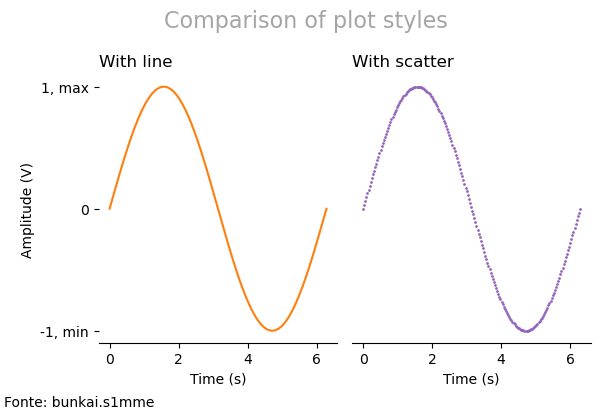

In [51]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(6,4)) #nrows=1, ncols=2, partilhar eixo dos xx
# figsize em INCHES!!! Página A4 tem 8x11 inches

ax1.plot(x, y, color='C1')
ax1.set_title('With line', loc='left')
ax1.set_ylabel('Amplitude (V)')
ax1.set_xlabel('Time (s)')

# Remover spines em todos os plots
for xa in [ax1, ax2]:
    xa.spines.right.set_visible(False)
    xa.spines.top.set_visible(False)
    xa.spines.left.set_visible(False)

# Tracinhos ao lado dos números
ax2.axes.yaxis.set_visible(False)

#Não é preciso tanto detalhe no eixo dos yy
#Podemos pôr os valores que quisermos e até uma label custom
ax1.set_yticks([-1, 0, 1])
ax1.set_yticklabels(['-1, min', '0', '1, max'])

## Segundo plot
ax2.scatter(x, y, c='C4', s=1)
ax2.set_title('With scatter', loc='left')
ax2.set_xlabel('Time (s)')

# Apontar a fonte da visualização é um bom toque
ax1.annotate("Fonte: bunkai.s1mme", (3,3), xycoords='figure points')

# Título global
f.suptitle("Comparison of plot styles", fontsize=16, color='#A5A5A5')

plt.tight_layout() #Tries to automatically adjust the layout to an optimal space occupation

#plt.subplots_adjust() #Sometimes you need to do it manually

plt.show()

## Saving an image

Em vez de fazer copy past em jupyter lab com o "Create New View for Output", é possível fazer save com um comando, forçando uma boa resolução ou **dpi**.

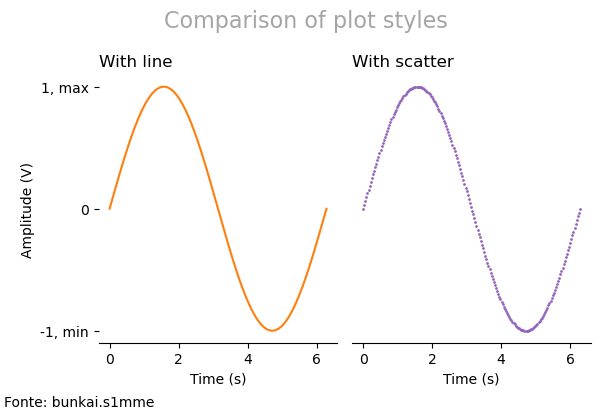

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(6,4)) #nrows=1, ncols=2, partilhar eixo dos xx
# figsize em INCHES!!! Página A4 tem 8x11 inches

ax1.plot(x, y, color='C1')
ax1.set_title('With line', loc='left')
ax1.set_ylabel('Amplitude (V)')
ax1.set_xlabel('Time (s)')

# Remover spines em todos os plots
for xa in [ax1, ax2]:
    xa.spines.right.set_visible(False)
    xa.spines.top.set_visible(False)
    xa.spines.left.set_visible(False)

# Tracinhos ao lado dos números
ax2.axes.yaxis.set_visible(False)

#Não é preciso tanto detalhe no eixo dos yy
#Podemos pôr os valores que quisermos e até uma label custom
ax1.set_yticks([-1, 0, 1])
ax1.set_yticklabels(['-1, min', '0', '1, max'])

## Segundo plot
ax2.scatter(x, y, c='C4', s=1)
ax2.set_title('With scatter', loc='left')
ax2.set_xlabel('Time (s)')

# Apontar a fonte da visualização é um bom toque
ax1.annotate("Fonte: bunkai.s1mme", (3,3), xycoords='figure points')

# Título global
f.suptitle("Comparison of plot styles", fontsize=16, color='#A5A5A5')

plt.tight_layout() #Tries to automatically adjust the layout to an optimal space occupation

plt.savefig("./Figures/FirstPlot_t.png", dpi=300, transparent=True)
plt.savefig("./Figures/FirstPlot.png", dpi=300)

plt.show()

## Color Cycler

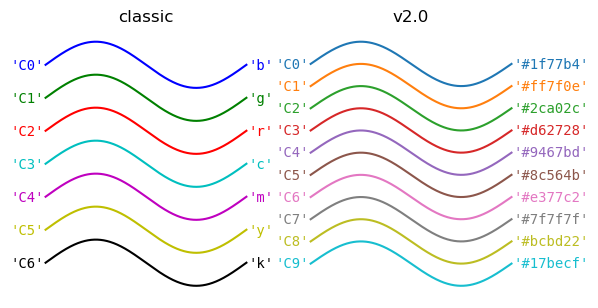

In [54]:
import numpy as np
import matplotlib.pyplot as plt

th = np.linspace(0, 2*np.pi, 512)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))


def color_demo(ax, colors, title):
    ax.set_title(title)
    for j, c in enumerate(colors):
        v_offset = -(j / len(colors))
        ax.plot(th, .1*np.sin(th) + v_offset, color=c)
        ax.annotate("'C{}'".format(j), (0, v_offset),
                    xytext=(-1.5, 0),
                    ha='right',
                    va='center',
                    color=c,
                    textcoords='offset points',
                    family='monospace')

        ax.annotate("{!r}".format(c), (2*np.pi, v_offset),
                    xytext=(1.5, 0),
                    ha='left',
                    va='center',
                    color=c,
                    textcoords='offset points',
                    family='monospace')
    ax.axis('off')

old_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

color_demo(ax1, old_colors, 'classic')
color_demo(ax2, new_colors, 'v2.0')

fig.subplots_adjust(**{'bottom': 0.0, 'left': 0.059,
                       'right': 0.869, 'top': 0.895})